# _Multilayer Perceptron (MLP)_

### Importação de bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de gráficos
import matplotlib.pyplot as plt

# Classificador MLP
from sklearn.neural_network import MLPClassifier

# Divisão do dataset
from sklearn.model_selection import train_test_split, cross_val_score

# Métricas de desempenho
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, ConfusionMatrixDisplay

# [CONFIG] Ignorar avisos
from warnings import filterwarnings
filterwarnings("ignore")

### Modificação do arquivo CSV

In [2]:
# Lê o dataset e armazena no DataFame 'cvd'
cvd = pd.read_csv("covid_dataset.csv")

# Substitui os booleanos por inteiros
cvd = cvd.replace({"Yes": 1, "No": 0})

# Salva o DataFrame modificado em um novo CSV 'covid_new'
cvd.to_csv("covid_new.csv", index=False)

### Leitura do novo arquivo CSV

In [3]:
cvd = pd.read_csv("covid_new.csv")

### Manipulação de dados

In [4]:
# Seleciona os valores
values = cvd.iloc[:, :-1].values

# Seleciona os labels
labels = cvd.iloc[:, -1:].values

### Divisão do dataset

In [5]:
# Separa os valores e labels de treino e teste
values_train, values_test, labels_train, labels_test = train_test_split(values, labels, test_size=0.3, random_state=42)

### Dicionário de modelos

In [6]:
# Dicionário contendo variações do modelo de MLP padrão
models = {
    "Default": MLPClassifier(random_state=1),
    "Increased Max Number Of Iterations": MLPClassifier(random_state=1, max_iter=10000),
    "Decreased Max Number Of Iterations": MLPClassifier(random_state=1, max_iter=5),
    "Increased Hidden Layers Sizes": MLPClassifier(random_state=1, hidden_layer_sizes=(500,)),
    "Decreased Hidden Layers Sizes": MLPClassifier(random_state=1, hidden_layer_sizes=(5,)),
    "Doubled Amount Of Hidden Layers": MLPClassifier(random_state=1, hidden_layer_sizes=(100, 100,)),
    "Identity Activation Function": MLPClassifier(random_state=1, activation="identity"),
    "Logistic Activation Function": MLPClassifier(random_state=1, activation="logistic"),
    "Tanh Activation Function": MLPClassifier(random_state=1, activation="tanh"),
    "LBFGS Solver": MLPClassifier(random_state=1, solver="lbfgs"),
    "SGD Solver": MLPClassifier(random_state=1, solver="sgd"),
    "Adaptive Learning Rate": MLPClassifier(random_state=1, learning_rate="adaptive"),
    "Invscaling Learning Rate": MLPClassifier(random_state=1, learning_rate="invscaling")
}

### Utilitários

In [7]:
# Listas para armazenar os resultados para as diferentes métricas
accuracies_train = []
accuracies_test = []
precisions = []
cv_scores = []
recall_scores = []
f1_scores = []

# Retorna a porcentagem (em string) de um determinado float
percentage = lambda x: f"{round(x * 100, 2)}%"

def test(model, values, labels):
    '''
    Testa um modelo e retorna a sua previsão e a sua acurácia, respectivamente
    '''
    prediction = model.predict(values)
    return prediction, accuracy_score(labels, prediction)


def train(model, values, labels):
    '''
    Treina um modelo e retorna a sua previsão e a sua acurácia, respectivamente
    '''
    model.fit(values, labels)
    return test(model, values, labels)


def cross_val(model, values, labels):
    '''
    Aplica o cross validation em um modelo e retorna o resultado
    '''
    scores = cross_val_score(model, values, labels, cv=5)
    return np.mean(scores)


def plot_conf_matrix(name, labels, prediction):
    '''
    Plota a matriz de confusão de um teste
    '''
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(labels, prediction, ax=ax, cmap=plt.cm.Reds)
    _ = ax.set_title(f"{name} Confusion Matrix")


def plot_grouped_bar_chart(models, metrics):
    '''
    Plota gráficos de barras agrupadas de diferentes modelos para diferentes métricas
    '''
    with plt.style.context("seaborn-whitegrid"):
        fig, ax = plt.subplots(figsize=(15, 5))
        plt.title("Results By Metric")
        bar_width = 0.1
        index = np.arange(len(models))
        for i, metric in enumerate(metrics):
            ax.bar(index + i * bar_width, metric[0], bar_width, label=metric[1], color=metric[2])
        ax.set(ylim=(0.7, 1), yticks=np.arange(0.7, 1, 0.05))
        plt.xticks(index + bar_width, models.keys(), rotation=75, fontsize=10)
        plt.legend(loc="lower left", bbox_to_anchor=(-0.035, -0.8), ncols=3, frameon=True)
        plt.show()


### Análise de desempenho

-Default Results-
Train Accuracy: 97.95%
Test Accuracy: 97.79%
Precision: 98.26%
Cross Validation Score: 0.9177329260420745
Recall Score: 0.9901140684410646
F1-Score: 0.9863636363636363

-Increased Max Number Of Iterations Results-
Train Accuracy: 97.95%
Test Accuracy: 97.79%
Precision: 98.26%
Cross Validation Score: 0.9177329260420745
Recall Score: 0.9901140684410646
F1-Score: 0.9863636363636363

-Decreased Max Number Of Iterations Results-
Train Accuracy: 85.96%
Test Accuracy: 85.65%
Precision: 84.89%
Cross Validation Score: 0.8645524455264884
Recall Score: 1.0
F1-Score: 0.9182960893854748

-Increased Hidden Layers Sizes Results-
Train Accuracy: 98.29%
Test Accuracy: 98.22%
Precision: 99.16%
Cross Validation Score: 0.9263863404948148
Recall Score: 0.9863117870722433
F1-Score: 0.9889439573008006

-Decreased Hidden Layers Sizes Results-
Train Accuracy: 96.98%
Test Accuracy: 96.69%
Precision: 97.16%
Cross Validation Score: 0.9164492131180315
Recall Score: 0.9878326996197718
F1-Score: 0.

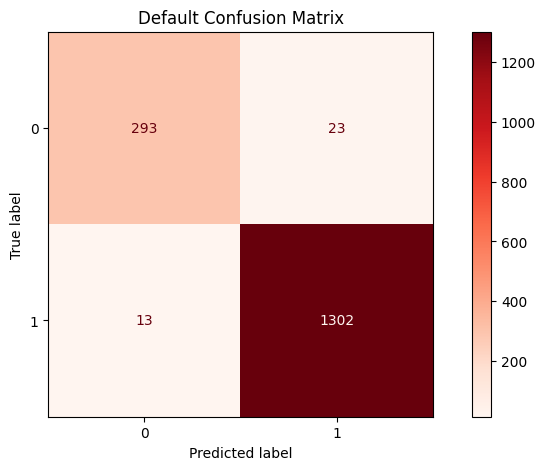

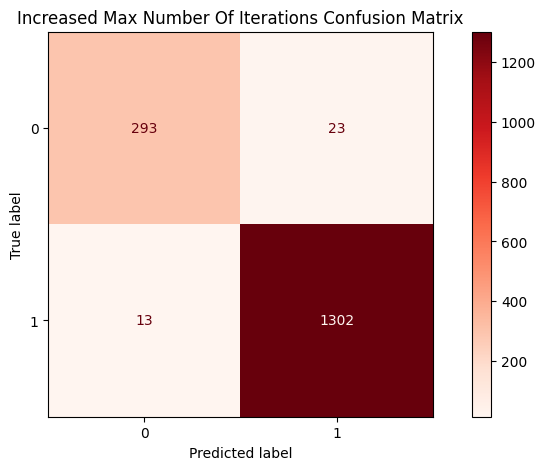

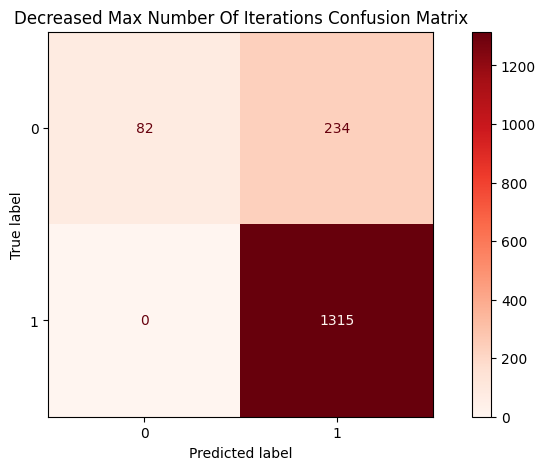

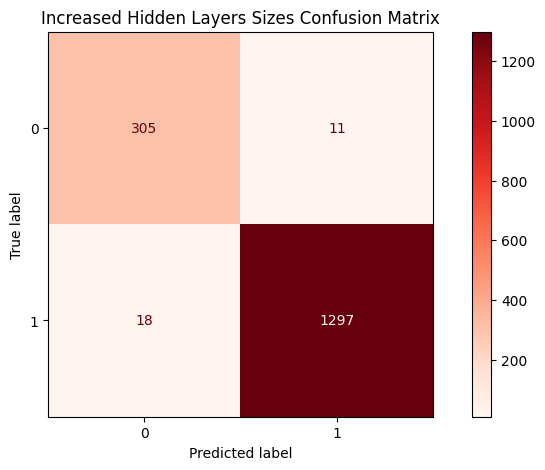

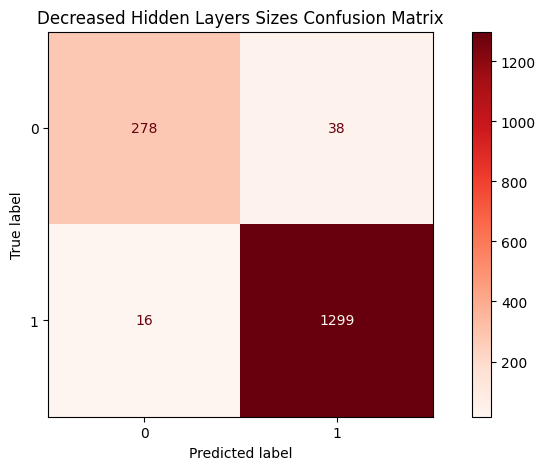

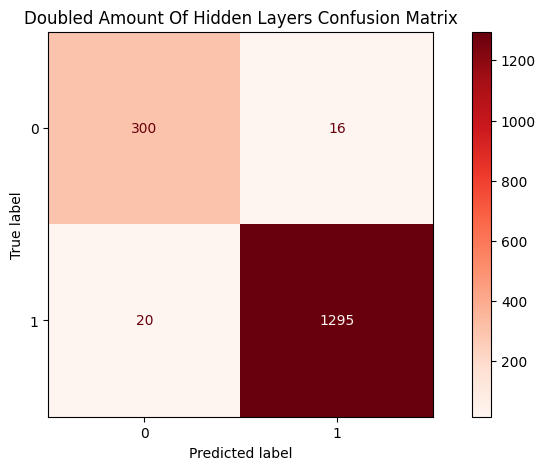

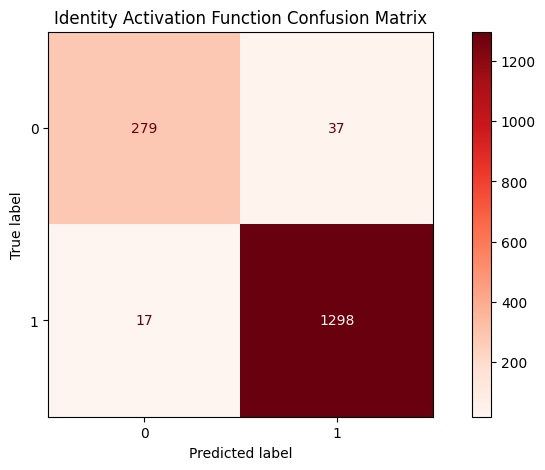

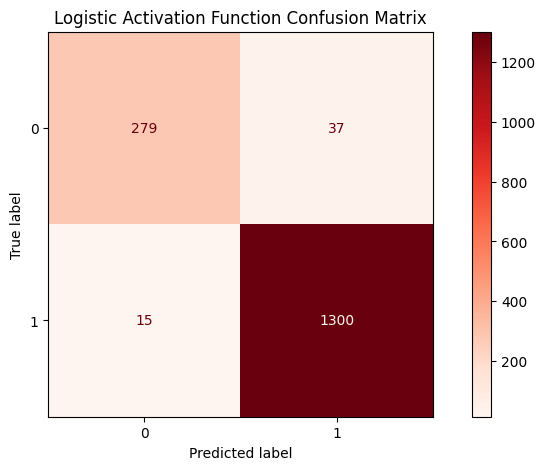

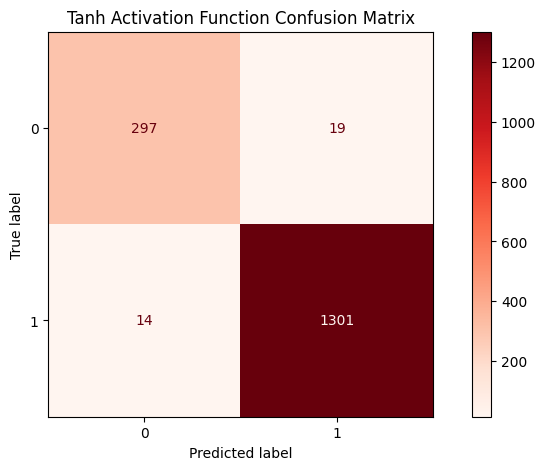

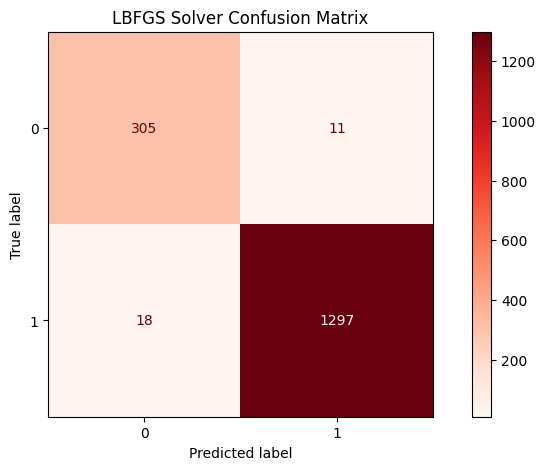

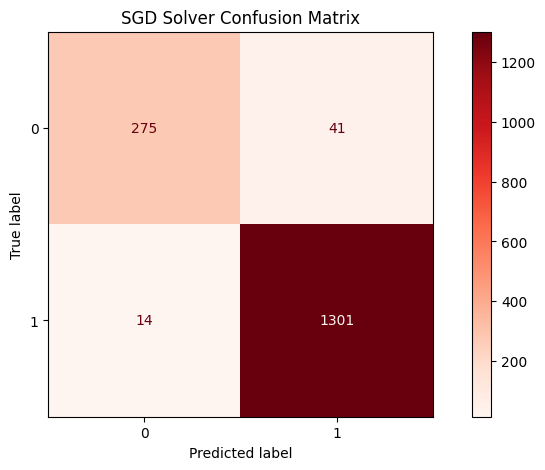

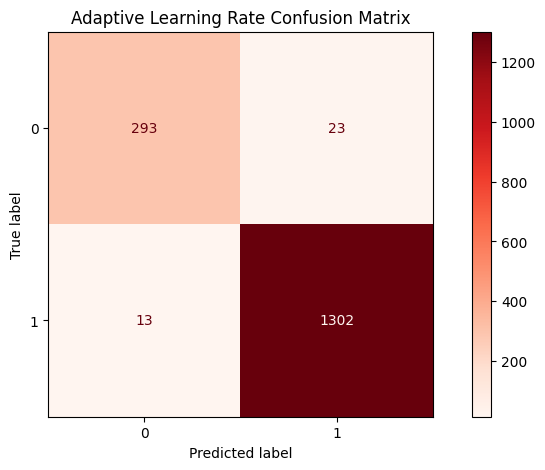

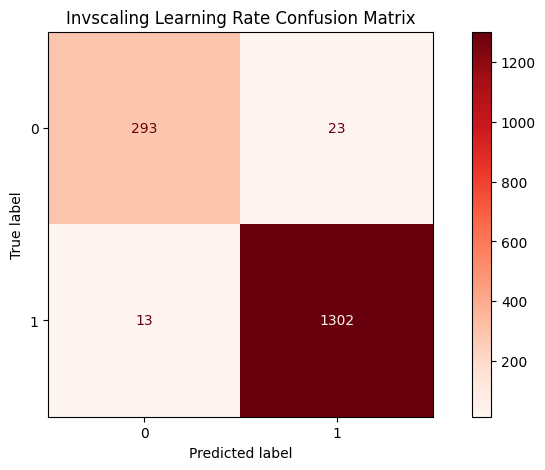

In [8]:
for name, model in models.items():
    print(f"\033[93m-{name} Results-\033[0m")

    train_prediction, train_accuracy = train(model, values_train, labels_train)
    accuracies_train.append(train_accuracy)
    print(f"Train Accuracy: {percentage(train_accuracy)}")

    test_prediction, test_accuracy = test(model, values_test, labels_test)
    accuracies_test.append(test_accuracy)
    print(f"Test Accuracy: {percentage(test_accuracy)}")

    precision = precision_score(labels_test, test_prediction)
    precisions.append(precision)
    print(f"Precision: {percentage(precision)}")

    cv_score = cross_val(model, values, labels)
    cv_scores.append(cv_score)
    print(f"Cross Validation Score: {cv_score}")

    recall = recall_score(labels_test, test_prediction)
    recall_scores.append(recall)
    print(f"Recall Score: {recall}")

    f1 = f1_score(labels_test, test_prediction)
    f1_scores.append(f1)
    print(f"F1-Score: {f1}\n")

    plot_conf_matrix(name, labels_test, test_prediction)


### Comparação dos desempenhos

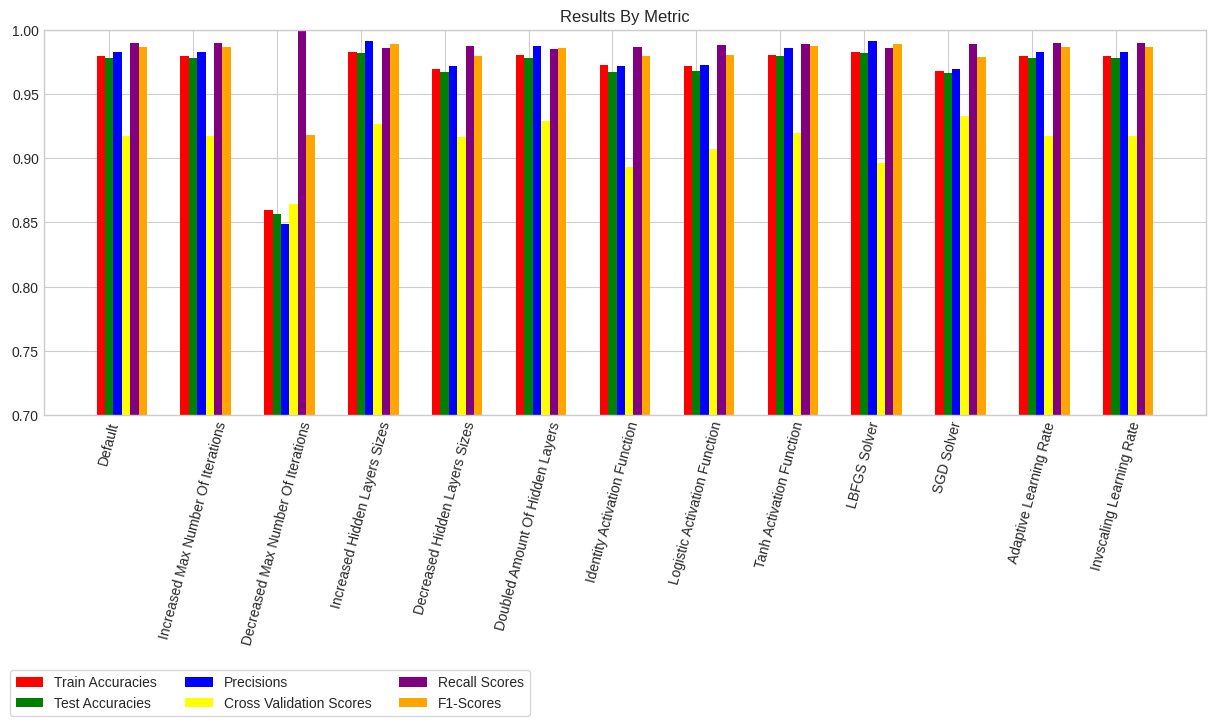

In [9]:
# Lista contendo as métricas a serem plotadas, seus títulos e cores
metrics = [
    (accuracies_train, "Train Accuracies", "red"),
    (accuracies_test, "Test Accuracies", "green"),
    (precisions, "Precisions", "blue"),
    (cv_scores, "Cross Validation Scores", "yellow"),
    (recall_scores, "Recall Scores", "purple"),
    (f1_scores, "F1-Scores", "orange"),
]

plot_grouped_bar_chart(models, metrics)

### Forçando situações extremas

-Forced Overfitting Results-
Train Accuracy: 98.29%
Test Accuracy: 98.22%
Precision: 99.16%
Cross Validation Score: 0.8893884023644579
Recall Score: 0.9863117870722433
F1-Score: 0.9889439573008006

-Forced Underfitting Results-
Train Accuracy: 71.15%
Test Accuracy: 70.14%
Precision: 81.65%
Cross Validation Score: 0.7326124413586992
Recall Score: 0.8121673003802281
F1-Score: 0.8143347312237895



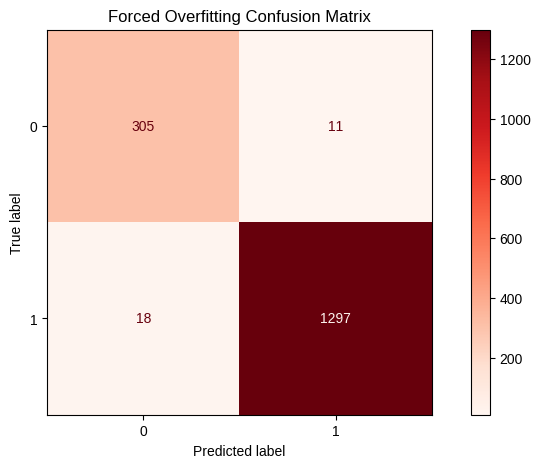

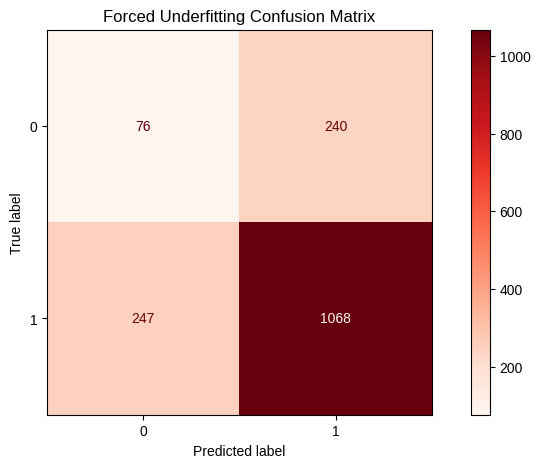

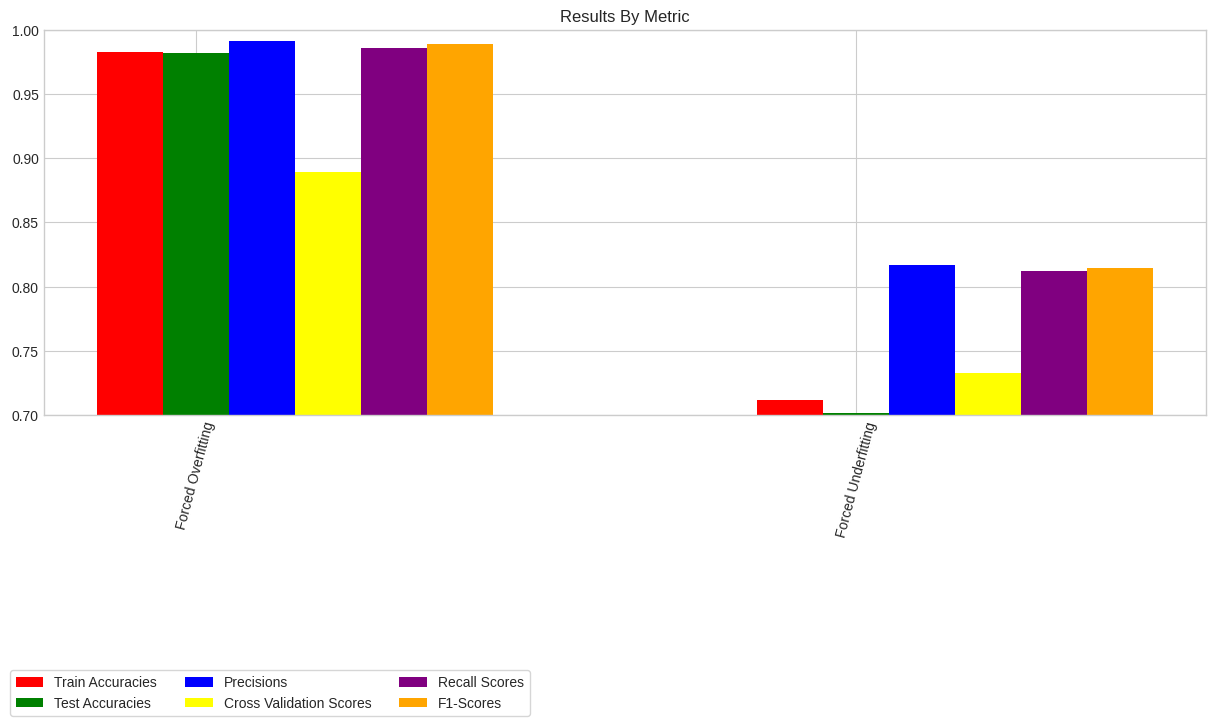

In [10]:
extreme_models = {
    "Forced Overfitting": MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(500,), solver="lbfgs"),
    "Forced Underfitting": MLPClassifier(random_state=1, max_iter=5, hidden_layer_sizes=(5,), activation="identity"),
}

extreme_accuracies_train = []
extreme_accuracies_test = []
extreme_precisions = []
extreme_cv_scores = []
extreme_recall_scores = []
extreme_f1_scores = []

for name, model in extreme_models.items():
    print(f"\033[93m-{name} Results-\033[0m")

    train_prediction, train_accuracy = train(model, values_train, labels_train)
    extreme_accuracies_train.append(train_accuracy)
    print(f"Train Accuracy: {percentage(train_accuracy)}")

    test_prediction, test_accuracy = test(model, values_test, labels_test)
    extreme_accuracies_test.append(test_accuracy)
    print(f"Test Accuracy: {percentage(test_accuracy)}")

    precision = precision_score(labels_test, test_prediction)
    extreme_precisions.append(precision)
    print(f"Precision: {percentage(precision)}")

    cv_score = cross_val(model, values, labels)
    extreme_cv_scores.append(cv_score)
    print(f"Cross Validation Score: {cv_score}")

    recall = recall_score(labels_test, test_prediction)
    extreme_recall_scores.append(recall)
    print(f"Recall Score: {recall}")

    f1 = f1_score(labels_test, test_prediction)
    extreme_f1_scores.append(f1)
    print(f"F1-Score: {f1}\n")

    plot_conf_matrix(name, labels_test, test_prediction)


extreme_metrics = [
    (extreme_accuracies_train, "Train Accuracies", "red"),
    (extreme_accuracies_test, "Test Accuracies", "green"),
    (extreme_precisions, "Precisions", "blue"),
    (extreme_cv_scores, "Cross Validation Scores", "yellow"),
    (extreme_recall_scores, "Recall Scores", "purple"),
    (extreme_f1_scores, "F1-Scores", "orange"),
]

plot_grouped_bar_chart(extreme_models, extreme_metrics)